## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja logistyczna z wielomianowymi cechami

Poznaliśmy dwa algorytmy służące do rozwiązywania problemów klasyfikacji binarnej. Oba z nich bazowały na budowie sztucznego neuronu. Pierwszym z nich był prosty perceptron liniowy, który wykorzystywał skokową funkcję aktywacji do mapowania ważonej sumy wejść na odpowiedź będącą $0$ lub $1$. Algorytm ten wykorzystywał również dedykowaną metodę uczenia, zwaną metodą perceptronową. Drugim poznanym algorytmem była regresja logistyczna, w której funkcja aktywacji została zamieniona ze skokowej na nieliniową funkcję sigmoidalną. Zamiana funkcji aktywacji na funkcję ciągłą otworzyło możliwości na optymalizacje algorytmu z wykorzystaniem metod gradientowych. Takie podejście do optymalizacji wyglądało bardzo podobnie jak w przypadku modelu regresji liniowej. Oba algorytmy miały jeden duży mankament - były w stanie stworzyć liniową granicę decyzyjną. Oznacza to, że w przypadku dwuwymiarowym granicą decyzyjną była prosta, w trójwymiarowym płaszczyzna, a $n$-wymiarowym ($n>3$) hiperpłaszczyzna. Przez to ograniczenie algorytmy nigdy nie będą zbieżne, jeśli zbiór danych nie będzie liniowo separowalny. Takie działanie jest mocno ograniczające, ponieważ bardzo rzadko będziemy mieć do czynienia ze zbiorem idealnie liniowo rozdzielnym.

Nietrudno wyobrazić sobie sytuację, gdy próbki z przeciwnych klas formują przeróżne kształty. Weźmy przykładowo zbiór danych, w którym próbki z dwóch klas formują dwa oddzielne okręgi - wewnętrzny i zewnętrzny.

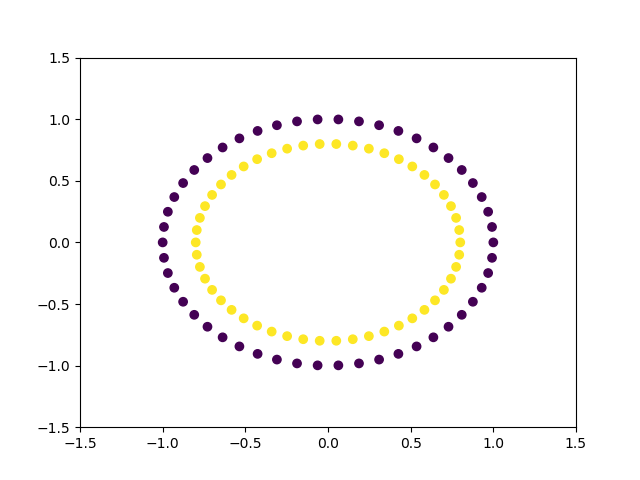

W takim przypadku nasz algorytm będzie próbował rozwiązać ten problem za pomocą liniowej granicy decyzyjnej, co oczywiście nigdy nie da dobrego wyniku.

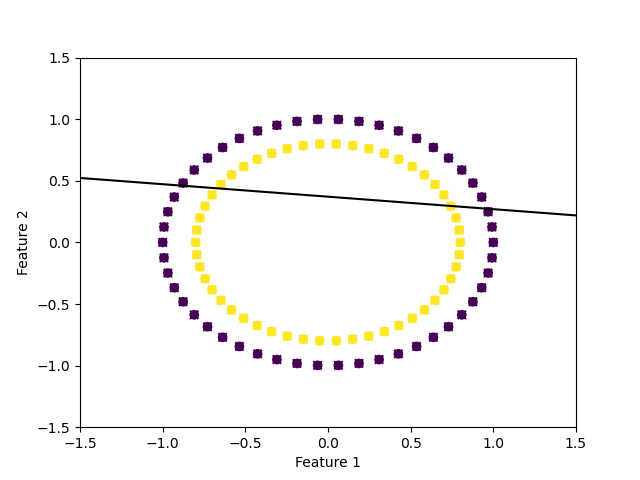

Czy można zmodyfikować wykorzystywane przez nas algorytmy, tak aby były w stanie rozwiązać powyższy problem i podobne problemy z natury nieliniowo separowalnych? Odpowiedź brzmi tak i z pomocą przychodzi mechanizm poznany przy okazji regresji liniowej.

### Wielomianowe cechy

Algorytm regresji wielomianowej polegał na dodaniu nowych, wielomianowych cech do zestawu danych. Dzięki temu zabiegowi można było stworzyć nieliniową funkcję regresji. Okazuje się, że ta sama sztuczka zadziała w przypadku klasyfikacji. Sam algorytm nie zmieni się, jeśli implementacja została stworzona w taki sposób, by obsługiwać dowolną ilość cech. Jedyne co trzeba wykonać przed podaniem zestawu danych na wejście algorytmu to dodanie nowych cech, które są potęgami i kombinacją oryginalnych cech.

Przykłady rozszerzenia cech dla kolejnych stopni:

* stopień 2 $[a, b] -> [1, a^1, b^1, a^2, a^1b^1, b^2]$
* stopień 3 $[a, b] -> [1, a^1, b^1, a^2, a^1b^1, b^2, a^3, a^2b^1, a^1b^2, b^3]$
* stopień 4 $[a, b] -> [1, a^1, b^1, a^2, a^1b^1, b^2, a^3, a^2b^1, a^1b^2, b^3, a^4, a^3b^1, a^2b^2, a^1b^3, b^4]$

Zwiększanie stopnia potęgi powoduje wygenerowanie większej ilości cech, które pozwalają tworzyć bardziej skomplikowane granice decyzyjne i lepiej dopasować się do danych treningowych. Niesie to jednak ryzyko przetrenowania, co w rezultacie przełoży się na słabe wyniki na danych testowych.

_W naszym przypadku, ze względu na walory dydaktyczne i wizualne, będziemy zajmować się przypadkiem z dwoma cechami (x) w oryginalnym zestawie danych. Jednak to podejście jest ogólne i może być zastosowane dla większej ilości cech._

### Efekt dodania wielomianowych cech

Już rozszerzenie cech dla drugiej potęgi powoduje, że możliwe staje się rozwiązanie problemu klasyfikacji przedstawionego wyżej.

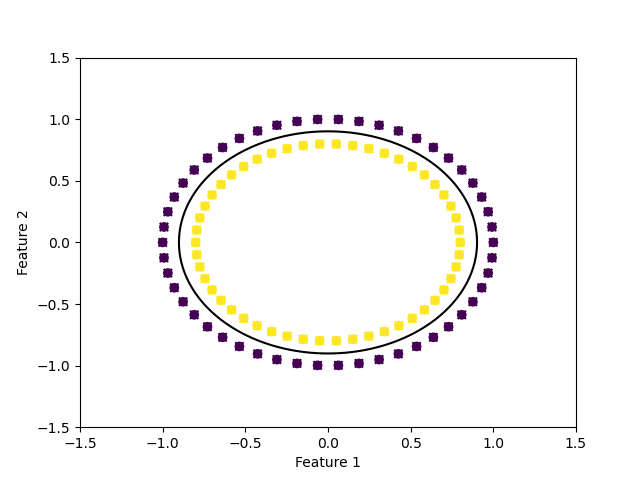

### Wizualizacja granicy decyzyjnej

Wizualizacja nieliniowej granicy decyzyjnej jest bardziej skomplikowana niż w przypadku prostej separującej dwie klasy. Aby stworzyć prostą, wystarczyło skorzystać ze wzoru na prostą i wykorzystać zwrócone przez model wagi. W przypadku, gdy tworzona jest nieliniowa granica decyzyjna, lepiej jest wykorzystać inne podejście. Należy wygenerować sobie punkty z zakresu, który chcemy przedstawić, a następnie stworzyć wszystkie kombinacje tych punktów, do tego właśnie służy funkcja 'np.meshgrid()' [(Wyjaśnienie działania z przykładami).](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy) Następnie dla każdego punktu należy wykonać predykcje naszym wytrenowanym klasyfikatorem. Należy pamiętać o uprzednim przetransformowaniu cech do postaci wielomianowej.

Przykładowy kod, który tworzy wykres danych wraz z granicą decyzyjną. W tym przypadku obszar wykresu został ograniczony do wartości od $-1.5$ do $1.5$. Oczywiście można to robić lepiej, na podstawie zakresu danych wejściowych.

```python
def plot_data_with_decision_boundary(X, Y, degree, clf):
u = np.linspace(-1.5, 1.5, 1000)
v = np.linspace(-1.5, 1.5, 1000)

U, V = np.meshgrid(u, v)

X_poly = mapFeature(U.ravel(), V.ravel(), degree)
Z = clf.predict(X_poly)

# reshape U, V, Z back to matrix
U = U.reshape((len(u), len(v)))
V = V.reshape((len(u), len(v)))
Z = Z.reshape((len(u), len(v)))

# plot data
plt.scatter(X[:, 0], X[:, 1], c=Y)

# plot decision boundary
plt.contour(U, V, Z, levels=[0.5], cmap="Greys_r")

plt.show()
```

### Zadanie 1

Wczytaj zbiór danych znajdujący się w pliku `circles.csv` i stwórz wykres próbek, oznaczając różne klasy. Następnie wykorzystaj zaimplementowany algorytm regresji logistycznej do znalezienia granicy decyzyjnej. Narysuj stworzoną granicę decyzyjną. Jaki jest wniosek?

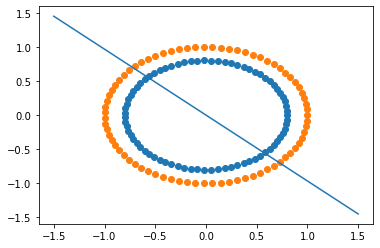

In [1]:
# YOUR CODE HERE
import numpy as np
import math
import pandas as pd
from random import random
import matplotlib.pyplot as plt


class Perceptron:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.W = np.array([[random()] for i in range(len(X[0]))])
        self.func = lambda x: 1/(1 + math.exp(-x))
        self.epoch = 100
        self.alfa = 0.01
    
    def perceptron(self, Xarg):
        FX = np.dot(Xarg, self.W)
        h = [self.func(i) for i in FX]
        h = np.array(h, ndmin=2).T
        return h

    def cost(self, h):
        return -self.Y*np.log10(h)-(1-self.Y)*np.log10(1-h)
    
    def SSE(self, h):
        return sum(self.cost(h))/len(self.X[0])
    
    def dSSE(self, h):
        return np.array(np.sum((h-self.Y)*self.X, axis=0), ndmin=2).T
    
    def weightChange(self, h):
        self.W = self.W - self.alfa*self.dSSE(h)
        
    def learn(self):
        weightlist = []
        errors = []
        for i in range(self.epoch):
            h = self.perceptron(self.X)
            self.weightChange(h)
            ssr = self.SSE(h)
            weightlist.append(self.W)
            errors.append(ssr)
        return weightlist, errors
    
df = pd.read_csv('datasets/circles.csv', sep=',')

tempX = df.to_numpy()[:,:2]
X = np.insert(tempX, 0, 1, axis=1)

y = df['y'].values.reshape(df['y'].shape[0], 1)

perceptron = Perceptron(X, y)
wages, errors = perceptron.learn()

W = wages[-1]
f = lambda x : (-W[2]*x - W[0])/W[1] 
plt.plot([-1.5,1.5], [f(-1.5), f(1.5)])

c1 = []
c2 = []

for i, j in zip(X, y):
    if j[0] == 1:
        c1.append(i)
    else:
        c2.append(i)

c1 = np.array(c1, ndmin=2)
c2 = np.array(c2, ndmin=2)

plt.scatter(c1[:, 1], c1[:, 2])
plt.scatter(c2[:, 1], c2[:, 2])

Wniosek:
Nie da się sklasyfikować tych danych granicą decyzyjną w postaci prostej

### Zadanie 2

Stwórz funkcje, `map_features(x1, x2, degree)`, która dla dwóch cech stworzy wszystkie wielomianowe kombinacje tych cech aż do potęgi określonej za pomocą zmiennej `degree`. Są dwie możliwości implementacji tej funkcji. Może przyjmować dwie liczby i zwracać wektor (1-wymiarową tablicę) lub przyjmować dwa wektory i zwracać macierz (2-wymiarową tablicę).  

Przykłady rozszerzenia cech dla kolejnych stopni:

* `degree = 2` $[a, b] -> [1, a^1, b^1, a^2, a^1b^1, b^2]$
* `degree = 3` $[a, b] -> [1, a^1, b^1, a^2, a^1b^1, b^2, a^3, a^2b^1, a^1b^2, b^3]$
* `degree = 4` $[a, b] -> [1, a^1, b^1, a^2, a^1b^1, b^2, a^3, a^2b^1, a^1b^2, b^3, a^4, a^3b^1, a^2b^2, a^1b^3, b^4]$

_Wartość $1$, która znajduje się na początku, to wyraz wolny i jest dodana dla wagi $w_0$. W przypadku, gdy w algorytmie waga $w_0$ aktualizowana jest osobno, można ją pominąć._

In [2]:
# YOUR CODE HERE
def map_features(x1, x2, degree):
    result = []
    for deg in range(degree+1):
        temp = deg
        while(temp != -1):
            result.append((x1**(temp))*(x2**(deg-temp)))
            temp -= 1
    return np.array(result, ndmin=2).T


### Zadanie 3

Wykorzystaj napisaną w zadaniu 2 funkcję do stworzenia dodatkowych cech w zestawie danych `circles.csv`. Tak zmieniony zestaw danych podaj na wejście klasyfikatora regresji logistycznej. Stwórz wykres z narysowaną granicą decyzyjną.

Powtórz tą czynność dla różnych wartości `degree` i porównaj wykresy ze sobą.

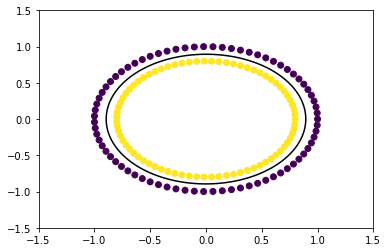

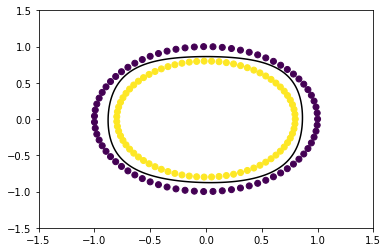

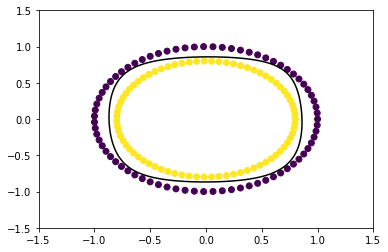

In [6]:
# YOUR CODE HERE
def plot_data_with_decision_boundary(X, Y, degree, clf):
    u = np.linspace(-1.5, 1.5, 1000)
    v = np.linspace(-1.5, 1.5, 1000)

    U, V = np.meshgrid(u, v)

    X_poly = map_features(U.ravel(), V.ravel(), degree)
    Z = clf.perceptron(X_poly)

    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))

    # plot data
    plt.scatter(X[:, 1], X[:, 2], c=Y)

    # plot decision boundary
    plt.contour(U, V, Z, levels=[0.5], cmap="Greys_r")

    plt.show()
    
features = map_features(X[:, 1], X[:, 2], 2)
perc = Perceptron(features, y)
wages, errors = perc.learn()

plot_data_with_decision_boundary(X, y, 2, perc)

features = map_features(X[:, 1], X[:, 2], 5)
perc = Perceptron(features, y)
wages, errors = perc.learn()

plot_data_with_decision_boundary(X, y, 5, perc)

features = map_features(X[:, 1], X[:, 2], 7)
perc = Perceptron(features, y)
wages, errors = perc.learn()

plot_data_with_decision_boundary(X, y, 7, perc)

Przy zwiększaniu stopnia można zauważyć że granica decyzyjna staje się coraz bardziej "kwadratowa". W przypadku tych danych najlepiej dopasowuje się klasyfikator z wejściami podniesionymi do stopnia 2